Documentation for the latest version of Gudhi: http://gudhi.gforge.inria.fr/python/latest/

# Simplicial complexes and simplex trees

In Gudhi, (filtered) simplicial complexes are encoded through a data structure called simplex tree. Here is a very simple example illustrating the use of simplex tree to represent simplicial complexes. See the Gudhi documentation for a complete list of functionalities. Try the following code and a few other functionalities from the documentation to get used to the Simplex Tree data structure.

In [1]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

In [2]:
st = gd.SimplexTree() # Create an empty simplicial complex

# Simplicies can be inserted 1 by 1
# Vertices are indexed by integers
if st.insert([0,1]):
    print("First simplex inserted!")
st.insert([1,2])
st.insert([2,3])
st.insert([3,0])
st.insert([0,2])
st.insert([3,1])

First simplex inserted!


True

In [3]:
L = st.get_filtration() # Get a list with all simplices
# Notice that inserting an edge automatically inserts its vertices, if they were not already in the complex
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


In [4]:
# Insert the 2-skeleton, giving some filtration values to the faces
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,2,3],filtration=0.3)
st.insert([0,1,3],filtration=0.4)

# If you add a new simplex with a given filtration value, all its faces that 
# were not in the complex are inserted with the same filtration value
st.insert([2,3,4],filtration=0.7)
st.get_filtration()

[([0], 0.0),
 ([1], 0.0),
 ([0, 1], 0.0),
 ([2], 0.0),
 ([0, 2], 0.0),
 ([1, 2], 0.0),
 ([3], 0.0),
 ([0, 3], 0.0),
 ([1, 3], 0.0),
 ([2, 3], 0.0),
 ([0, 1, 2], 0.1),
 ([1, 2, 3], 0.2),
 ([0, 2, 3], 0.3),
 ([0, 1, 3], 0.4),
 ([4], 0.7),
 ([2, 4], 0.7),
 ([3, 4], 0.7),
 ([2, 3, 4], 0.7)]

In [5]:
# Many operations can be done on simplicial complexes, see also the Gudhi documentation and examples
print("dimension=",st.dimension())
print("filtration[1,2]=",st.filtration([1,2]))
print("filtration[4,2]=",st.filtration([4,2]))
print("num_simplices=", st.num_simplices())
print("num_vertices=", st.num_vertices())
print("skeleton[2]=", st.get_skeleton(2))
print("skeleton[1]=", st.get_skeleton(1))
print("skeleton[0]=", st.get_skeleton(0))

dimension= 2
filtration[1,2]= 0.0
filtration[4,2]= 0.7
num_simplices= 18
num_vertices= 5
skeleton[2]= [([0, 1, 2], 0.1), ([0, 1, 3], 0.4), ([0, 1], 0.0), ([0, 2, 3], 0.3), ([0, 2], 0.0), ([0, 3], 0.0), ([0], 0.0), ([1, 2, 3], 0.2), ([1, 2], 0.0), ([1, 3], 0.0), ([1], 0.0), ([2, 3, 4], 0.7), ([2, 3], 0.0), ([2, 4], 0.7), ([2], 0.0), ([3, 4], 0.7), ([3], 0.0), ([4], 0.7)]
skeleton[1]= [([0, 1], 0.0), ([0, 2], 0.0), ([0, 3], 0.0), ([0], 0.0), ([1, 2], 0.0), ([1, 3], 0.0), ([1], 0.0), ([2, 3], 0.0), ([2, 4], 0.7), ([2], 0.0), ([3, 4], 0.7), ([3], 0.0), ([4], 0.7)]
skeleton[0]= [([0], 0.0), ([1], 0.0), ([2], 0.0), ([3], 0.0), ([4], 0.7)]


# Filtrations and persistence diagrams

In [6]:
# As an example, we assign to each simplex its dimension as filtration value
for splx in st.get_filtration():
    st.assign_filtration(splx[0],len(splx[0])-1)
# Let the structure know that we have messed with it and an old filtration cache may be invalid.
# This is redundant here because get_filtration() does it anyway, but not all functions do.
st.initialize_filtration()
st.get_filtration()

[([0], 0.0),
 ([1], 0.0),
 ([2], 0.0),
 ([3], 0.0),
 ([4], 0.0),
 ([0, 1], 1.0),
 ([0, 2], 1.0),
 ([1, 2], 1.0),
 ([0, 3], 1.0),
 ([1, 3], 1.0),
 ([2, 3], 1.0),
 ([2, 4], 1.0),
 ([3, 4], 1.0),
 ([0, 1, 2], 2.0),
 ([0, 1, 3], 2.0),
 ([0, 2, 3], 2.0),
 ([1, 2, 3], 2.0),
 ([2, 3, 4], 2.0)]

In [7]:
# To compute the persistence diagram of the filtered complex
# By default it stops at dimension-1, use persistence_dim_max=True
# to compute homology in all dimensions
diag = st.persistence(persistence_dim_max=True)
# Display each interval as (dimension, (birth, death))
print(diag)

[(2, (2.0, inf)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<module 'matplotlib.pyplot' from '/home/glisse/data/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

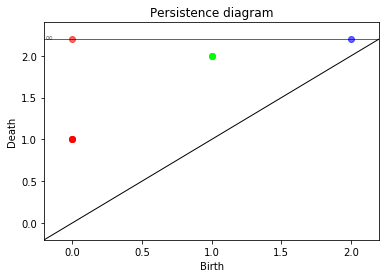

In [8]:
# Plot a persistence diagram
gd.plot_persistence_diagram(diag)

<module 'matplotlib.pyplot' from '/home/glisse/data/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

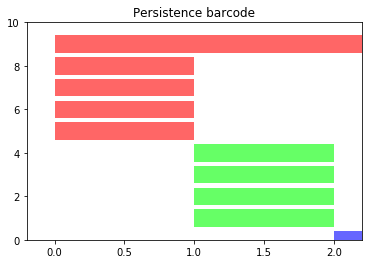

In [9]:
gd.plot_persistence_barcode(diag)

<module 'matplotlib.pyplot' from '/home/glisse/data/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

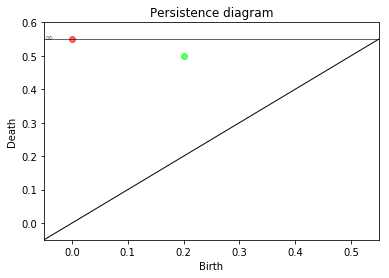

In [10]:
# To compute the bottleneck distance between diagrams
st2 = gd.SimplexTree()
st2.insert([0,1],filtration=0.0)
st2.insert([1,2],filtration=0.1)
st2.insert([2,0],filtration=0.2)
st2.insert([0,1,2],filtration=0.5)
diag2 = st2.persistence()
gd.plot_persistence_diagram(diag2)

In [11]:
diag_0 = st.persistence_intervals_in_dimension(0)
diag2_0 = st2.persistence_intervals_in_dimension(0)
dB0 = gd.bottleneck_distance(diag_0, diag2_0)

diag_1 = st.persistence_intervals_in_dimension(1)
diag2_1 = st2.persistence_intervals_in_dimension(1)
dB1 = gd.bottleneck_distance(diag_1, diag2_1)

print("bottleneck distance in dimension 0:", dB0)
print("bottleneck distance in dimension 1:", dB1)

bottleneck distance in dimension 0: 0.5
bottleneck distance in dimension 1: 0.5


## Exercise
1. Recall the torus is homeomorphic to the surface obtained by identifying the opposite sides of a square as illustrated below. ![Figure 1](TorusTriangle.png) Using Gudhi, construct a triangulation (2-dimensional simplicial complex) of the Torus. Define a filtration on it, compute its persistence and use it to deduce the Betti numbers of the torus (check that you get the correct result using the function betti_numbers()).
2. Use Gudhi to compute the Betti numbers of a sphere of dimension 2 and of a sphere of dimension 3 (hint: the k -dimensional sphere is homeomorphic to the boundary of a (k+1)-dimensional simplex.

In [12]:
torus=gd.SimplexTree()
for i in range(3):
    for j in range(3):
        torus.insert([i+3*j, (i+1)%3+3*j, (i+1)%3+3*((j+1)%3)])
        torus.insert([i+3*j, i+3*((j+1)%3), (i+1)%3+3*((j+1)%3)])
for s in torus.get_filtration():
    if len(s[0])==3:
        print(s)

# Usually we only compute persistence up to dimension dim-1
# Special request that we also want dimension 2
diagTorus=torus.persistence(persistence_dim_max=True)
# Even if we do not use diagTorus directly, persistence() has to be called first
torus.betti_numbers()

([0, 2, 3], 0.0)
([0, 1, 4], 0.0)
([0, 3, 4], 0.0)
([1, 2, 5], 0.0)
([2, 3, 5], 0.0)
([1, 4, 5], 0.0)
([0, 1, 6], 0.0)
([3, 5, 6], 0.0)
([1, 2, 7], 0.0)
([3, 4, 7], 0.0)
([1, 6, 7], 0.0)
([3, 6, 7], 0.0)
([0, 2, 8], 0.0)
([4, 5, 8], 0.0)
([0, 6, 8], 0.0)
([5, 6, 8], 0.0)
([2, 7, 8], 0.0)
([4, 7, 8], 0.0)


[1, 2, 1]

In [13]:
# The simplest version, insert also inserts the boundary, but remove only removes the simplex itself
sphere2=gd.SimplexTree()
tetrahedron=range(4)
sphere2.insert(tetrahedron)
sphere2.remove_maximal_simplex(tetrahedron)
diagSphere2=sphere2.persistence(persistence_dim_max=True)
sphere2.betti_numbers()

[1, 0, 1]

In [14]:
# Alternative, inserting the faces of a simplex one by one
sphere3=gd.SimplexTree()
for vertex in range(5):
    sphere3.insert([v for v in range(5) if v!=vertex])
diagSphere3=sphere3.persistence(persistence_dim_max=True)
sphere3.betti_numbers()

[1, 0, 0, 1]

# Stability of persistence for functions

The goal of this exercise is to illustrate the persistence stability theorem for functions on a very simple example. The code below allows to define a simplicial complex (the so-called α-complex) triangulating a set of random points in the unit square in the plane. Although we are not using it for this course, note that gudhi also provides the grid-like CubicalComplex, which may be a more natural choice to represent a function on a square.

In [15]:
n_pts=1000
# Build a random set of points in the unit square
X = np.random.rand(n_pts, 2)
# Compute the alpha-complex filtration
alpha_complex = gd.AlphaComplex(points=X)
st = alpha_complex.create_simplex_tree()

Let $p_0=(0.25, 0.25)$ and $p_1=(0.75, 0.75)$ be 2 points in the plane $\mathbb{R}^2$ and $\sigma=0.05$.
1. Build on such a complex the sublevelset filtration of the function $$f(p)=\exp(-\frac{\|p-p_0\|^2}{\sigma})+3\exp(-\frac{\|p-p_1\|^2}{\sigma})$$ and compute its persistence diagrams in dimensions 0 and 1.
2. Compute the persistence diagrams of random perturbations of f and compute the Bottleneck distance between these persistence diagrams and the perturbated ones. Verify that the persistence stability theorem for functions is satisfied.

In [16]:
def f(x,y):
    sigma=0.05
    T1 = np.exp(-(np.square(x-0.25)+np.square(y-0.25))/sigma)
    T2 = np.exp(-(np.square(x-0.75)+np.square(y-0.75))/sigma)
    return T1 + 3*T2
values = f(X[:,0],X[:,1])

<module 'matplotlib.pyplot' from '/home/glisse/data/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

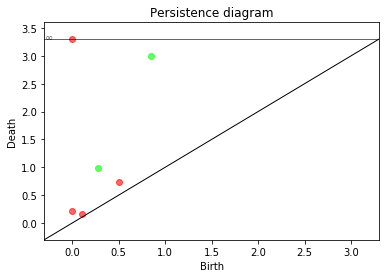

In [17]:
for s in st.get_filtration():
    st.assign_filtration(s[0],max(values[s[0]]))
# We have messed with the filtration
st.initialize_filtration()
diag = st.persistence()
diag_0 = st.persistence_intervals_in_dimension(0)
diag_1 = st.persistence_intervals_in_dimension(1)
gd.plot_persistence_diagram(diag)

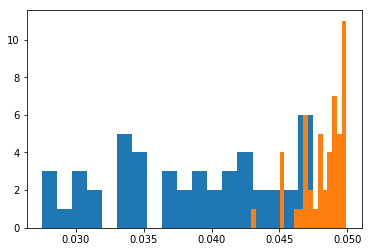

In [18]:
# Compute the persistence diagram for the randomly perturbated function
pert = 0.05
n_it = 50
B_List0 = []
B_List1 = []

for i in range(n_it):
    # Perturb the values
    values_pert = values + np.random.uniform(-pert, pert, len(values))
    # We reuse the same complex
    for splx in st.get_filtration():
        st.assign_filtration(splx[0], max(values_pert[splx[0]]))

    # The filtration has changed
    st.initialize_filtration()
    diag_pert = st.persistence() #compute persistence diagram(s)
    #gd.plot_persistence_diagram(diag_pert)
    diag_pert_0 = st.persistence_intervals_in_dimension(0)
    diag_pert_1 = st.persistence_intervals_in_dimension(1)
    B_List0.append(gd.bottleneck_distance(diag_0,diag_pert_0))
    B_List1.append(gd.bottleneck_distance(diag_1,diag_pert_1))

# Plot histograms of bottleneck distances between the non perturbated fn and
# the perturbated ones. 
plt.hist(B_List1,bins=20)
plt.hist(B_List0,bins=20)
plt.show()

# Vietoris-Rips and alpha-complex filtrations

These are basic instructions to build Vietoris-Rips and α-complex filtrations and compute their persistence.

Number of simplices in the V-R complex:  42103


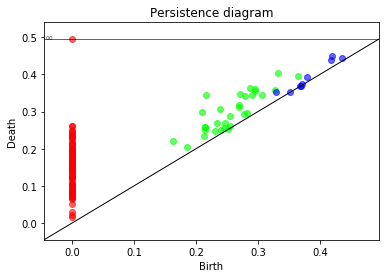

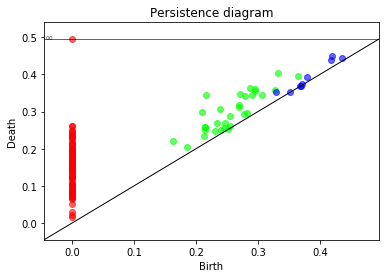

Number of simplices in the alpha-complex:  2315


<module 'matplotlib.pyplot' from '/home/glisse/data/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

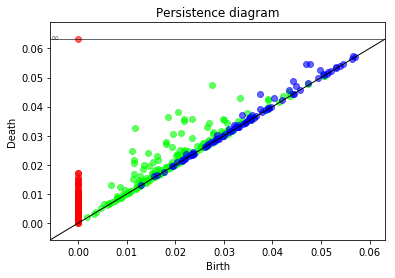

In [19]:
#Create a random point cloud in 3D
nb_pts=100
pt_cloud = np.random.rand(nb_pts,3)
#Build Rips-Vietoris filtration and compute its persistence diagram
rips_complex = gd.RipsComplex(pt_cloud,max_edge_length=0.5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
print("Number of simplices in the V-R complex: ",simplex_tree.num_simplices())
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag).show()
#Compute Rips-Vietoris filtration and compute its persistence diagram from
#a pairwise distance matrix
dist_mat = []
for i in range(nb_pts):
    ld = []
    for j in range(i):
        ld.append(np.linalg.norm(pt_cloud[i,:]-pt_cloud[j,:]))
    dist_mat.append(ld)
rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=0.5)
simplex_tree2 = rips_complex2.create_simplex_tree(max_dimension=3)
diag2 = simplex_tree2.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag2).show()
#Compute the alpha-complex filtration and compute its persistence
alpha_complex = gd.AlphaComplex(points=pt_cloud)
simplex_tree3 = alpha_complex.create_simplex_tree()
print("Number of simplices in the alpha-complex: ",simplex_tree3.num_simplices())
diag3 = simplex_tree3.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag3)

## Exercise

1. Illustrate the stability theorem for persistence diagrams of Vietoris-Rips and α-complex filtrations (take into accound that AlphaComplex uses the square of distances as filtration values).
2. What happens to Vietoris-Rips and α-complex filtrations when the size of the point cloud increases? When the ambient dimension increases?